# Overview of the Problem

Our client is interested in entering the mobile application market and seeks to gain a greater understanding of the space. As data scientists, we intend to provide our client with sufficient data-driven insights to present them with the most lucrative approach for a new application launch.

Due to the various facets of the market, it is important to consider what defines a successful application release. As such, our analysis focuses on the key features of applications within the marketplace with the goal of selecting the best feature set for the client’s potential application. This will help the client gain a strong foothold in the market and generate a dedicated audience.

# Exploratory Data Analysis

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [72]:
df = pd.read_csv("mobileApps.csv", encoding = "ISO-8859-1", engine='python')

## Data Cleaning

In [74]:
#Convert Crawl Date to datetime format; Convert Release Date to Datetime format and change app age column
df['crawl_date'] = pd.to_datetime(df['crawl_date'])
df['release_date'] = pd.to_datetime(df['release_date'])
df['app_age_current_version'] = (df['crawl_date']-df['release_date']).dt.days

In [75]:
#Remove nulls from region column
df = df[df['region'].notnull()]

In [76]:
#Change the average rating from 50 to 5
df.loc[df.average_rating > 10, 'average_rating'] = 5

In [77]:
# Change the category of the apps
df.loc[df.category =='Utilities > Notes åÊ', 'category'] = 'Utilities'
df.loc[df.category =='Social Networking åÊ', 'category'] = 'Social'
df.loc[df.category =='Games åÊ', 'category'] = 'Games'
df.loc[df.category =='Music > Radio åÊ', 'category'] = 'Games'
df.loc[df.category =='News & Magazines > Magazines åÊ', 'category'] = 'NEW'

## Distinct App Identification

There are no row duplicates in the dataset but a combination of device, app_store, region, release_date,
developer, app_type, price, filesize (MB), num_screenshot and the average_rating allow us to
identify a possible distinct app. We discovered that there are 7 rows per app in the data set for most of the
apps. Thus, we assume that each app has similar weight in the data set while performing all our analyses.

In [140]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [device, t_day, crawl_date, rank, app_store, region, release_date, app_age_current_version, developer, app_type, price, filesize (MB), num_screenshot, rating_count, average_rating, category, in_app_ads, in_app_purchase, num_issues_reported, weighted]
Index: []


In [96]:
df2 = df.groupby(['device','app_store','region','release_date','developer','app_type','price','filesize (MB)', 
'num_screenshot','average_rating'])

## Data Exploration

We first performed preliminary exploration of the data to gauge the distribution of various features

In [ ]:
#Distribution of apps for each device type
ax = df['device'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Device Type vs Count",
                                    rot = 0)
ax.set_xlabel("Device Type")
ax.set_ylabel("Count")
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.show()

Above graph description: Total numbero of apps for smartphone devices outnumbered tablet devices

In [ ]:
#Distribution of apps based on region
ax = df['region'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Distribution of Apps based on Region",
                                    rot=0)
ax.set_xlabel("Region")
ax.set_ylabel("Count")
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.show()

Above graph description: Total number of apps based in China outperformed apps based in the US

In [ ]:
#Distribution of apps based on the type of App Store
ax = df['app_store'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Distribution of Apps on App Store",
                                    rot=0)
ax.set_xlabel("App Store")
ax.set_ylabel("Count")
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.show()

Above graph description: Total number of apps in Apple App Store outperformed counts of apps in Google Play, while Amazon App Store only had a small amount of apps

Based on the above graph, the Amazon App Store counts for a very small number of Apps, hence we will we
concentrating mostly on the Apple and Google Play

In [107]:
df = df[df.app_store != 'Amazon']

In [ ]:
#Distribution of apps based on app types
ax = df['app_type'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Distribution of Apps based on app type",
                                    rot=0)
ax.set_xlabel("App Type")
ax.set_ylabel("Count")
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.show()

Above graph description: Number of free apps outperformed number of grossing and paid apps.

In [ ]:
#Distribution of screenshot
ax = df['num_screenshot'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Distribution of screenshots",
                                    rot=0)
ax.set_xlabel("Screenshots")
ax.set_ylabel("Count")
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.show()

Above graph description: Number of screenshots tend to be 5 or 10 per app

In [ ]:
#Distribution of average rating
ax = df['average_rating'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Distribution of average rating",
                                    rot=0)
ax.set_xlabel("App Type")
ax.set_ylabel("Count")
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.show()

Above graph description: Average rating tends to fall from the 4.0 to 5.0 range

Based on the insights from the graph, the ratings are skewed towards 4-5 bucket. This probably could be a
bias in our data or perhaps we are missing the reviews of a lot of people who might have rated in bucket 2-4.
Hence we want to create a new metric which will provide more balanced understanding of the data

## Success Metrics

Weighted Average: We used the Bayesian Average formula to determine an adjusted rating metric. The
Bayesian average adjusts the average rating of products whose rating counts fall below a threshold.

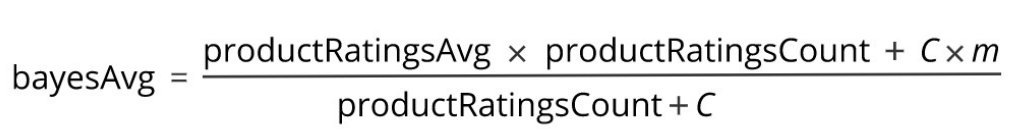

C = The 25th percentile rating count. This is the confidence number (threshold)

In [124]:
c = df.rating_count.quantile(0.25)

m = The arithmetic average rating of all the apps

In [125]:
m = df.average_rating.mean()

In [130]:
df['weighted'] = ((df['average_rating'] * df['rating_count']) + c * m)/(df['rating_count']+c)

<ipython-input-130-3a10648d2678>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weighted'] = ((df['average_rating'] * df['rating_count']) + c * m)/(df['rating_count']+c)


In [ ]:
#Distribution of apps across categories
ax = df['category'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Distribution of apps across categories",
                                    rot=0)
ax.set_xlabel("Category")
ax.set_ylabel("Count")
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.show()

Above graph description: Most apps fall into the Games category

## Execution and Output

In order to provide our client with the best strategy for the mobile application market, we conduct  exploratory data analysis on the data crawled from major app stores, which includes features such as device type, app ranking, region, developer, rating count, category, and whether the apps have in-app advertisements or purchases. 

In order to measure the success of apps, we wanted to measure user-engagement (proxied by number of ratings) and quality of engagement (proxied by average rating). Currently, we have separate measures for both in our data, which intuitively demands a new success metric that combines the two. Hence, we added a new metric leveraging these features, the Bayesian Average Rating, to create a more reliable comparison between apps. This metric affects apps with low rating counts much more than those that have a higher rating, ensuring that apps with lower rating counts have less weight in the ranking

Our analysis starts with exploring the Category variable. Among all categories, we saw that the Education category has the most potential due to a high Bayesian Average and a low number of total apps, which creates less competition.

When categorizing by region, we find that the US market is more viable for the client than the China market owing to the higher user engagement and lesser competitors.

Next, our team narrowed down our approach by analyzing the type of app store. Based on the data, Google Play would be the most profitable space to enter due to the established user base of applications and relatively small number of competitive developers.

Lastly, we want to determine which types of apps (free or paid) would be the best for our client. Within the Education category in Google Play, the user engagement of free apps is higher than that of paid apps while the Bayesian average rating of free apps is slightly lower than that of paid apps. We believe that clients can start with a free app and then move to in-app purchase afterwards. External research conducted by the Gartner Research Group shows that 24% of users are more likely to interact with in-app purchases over an upfront paid app, making this freemium model the ideal approach.

In addition, in order to effectively break into this market, the client should introduce an app with an average file size of approximately 29.3mb, along with seven screenshots as this is the general trend in the market.

## Implications and recommendations

Based on the findings from the data, we can conclude that the ideal application in the current marketplace is
a freemium educational application on the Google Play store. In addition, our client should primarily focus
on the US market as the entry point for their participation in the mobile application market. Selecting these
key areas will help ensure that the client’s application enters the marketplace in an advantageous position,
ensuring that they will be a visible competitor for their area and gradually gain a dedicated customer base
within the category.

We recommend that our client should gather additional information regarding Educational apps to determine
the optimal content for their prospective audience. Combined with our preliminary analysis, the strategy will
ensure a successful launch of the new application